<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/medinadiego_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 21:53:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-16 21:53:30 (591 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)

(435, 17)


In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.nan, 'n': 0, 'y': 1})

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,nan,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,nan
2,democrat,nan,1.0,1.0,nan,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,nan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,nan,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
dem.isnull().sum()

party                    0
handicapped-infants      9
water-project           28
budget                   7
physician-fee-freeze     8
el-salvador-aid         12
religious-groups         9
anti-satellite-ban       8
aid-to-contras           4
mx-missile              19
immigration              4
synfuels                12
education               18
right-to-sue            15
crime                   10
duty-free               16
south-africa            82
dtype: int64

In [0]:
# dem_edu['education'].astype(int)

In [0]:
# import seaborn as sns
# ax = sns.distplot(dem_edu['education'], color='b')

**2) 2 samples**

In [0]:
rep['education'].mean()

0.8709677419354839

In [0]:
dem['education'].mean()

0.14457831325301204

In [0]:
ttest_ind(dem['education'], rep['education'], nan_policy='omit')

Ttest_indResult(statistic=-20.500685724563073, pvalue=1.8834203990450192e-64)

**3) 2 samples**

In [0]:
rep['duty-free'].mean()

0.08974358974358974

In [0]:
dem['duty-free'].mean()

0.6374501992031872

In [0]:
ttest_ind(dem['duty-free'], rep['duty-free'], nan_policy='omit')

Ttest_indResult(statistic=12.853146132542978, pvalue=5.997697174347365e-32)

**4) 2 samples**

TEST
- null hypothesis: the difference in mean occured by chance
- alternative hypothesis: this is an issue both parties feel similar about


In [0]:
rep['water-project'].mean()

0.5067567567567568

In [0]:
dem['water-project'].mean()

0.502092050209205

In [0]:
# t-test
ttest_ind(dem['water-project'], rep['water-project'], nan_policy='omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

- After testing we got the results of: t-statistic being 0, p-value being .9 Due to this p-value, we failed to reject null hypothesis that results were random. It is very likely that both parties do feel similarily about the water project.

In [0]:
rep['water-project'].std()

0.5016519868797793

In [0]:
dem['water-project'].std()

0.50104493321917

In [0]:
(rep['water-project'].count()) - (rep['water-project'].isnull().sum())

128

In [0]:
(dem['water-project'].count()) - (dem['water-project'].isnull().sum())

211

In [0]:
mean_rep = 50675
mean_dem = 50209
std_rep = 50165
std_dem = 50104
samp_dem_size = 211
samp_rep_size = 128

In [0]:
for_rep = np.random.normal(mean_rep, std_rep, samp_rep_size)
for_dem = np.random.normal(mean_dem, std_dem, samp_dem_size)

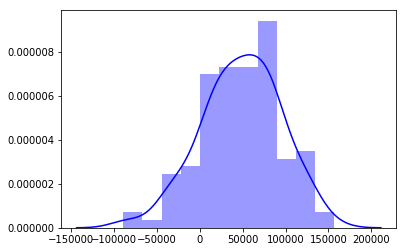

In [0]:
import seaborn as sns
ax = sns.distplot(for_rep, color='b')

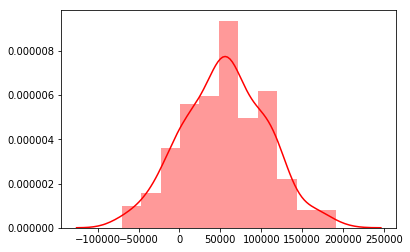

In [0]:
import seaborn as sns
ax = sns.distplot(for_dem, color='r') 

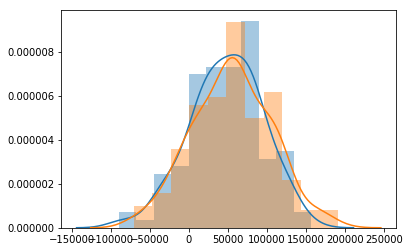

In [0]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots()
for sample in [for_rep, for_dem]:
  sns.distplot(sample)

**1 sample**

In [0]:
import matplotlib.pyplot as plt

- null hypothesis: There is no republican support for this bill
- alternative Hypothesis: There is non-zero support for the budget bill among republicans
- confidence level: 95%

In [0]:
rep['mx-missile'].mean()

0.11515151515151516

In [0]:
ttest_1samp(rep['religious-groups'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=38.02862698794469, pvalue=1.4751069893318224e-83)

- Due to a p-value of 1.47e83, we can reject the null hypothesis that republican support for mx-missles is zero and accept the probability that republican support is non-zero. 